In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [198]:
df = pd.read_csv('citrus.csv')

In [199]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [200]:
kn = KNeighborsClassifier()

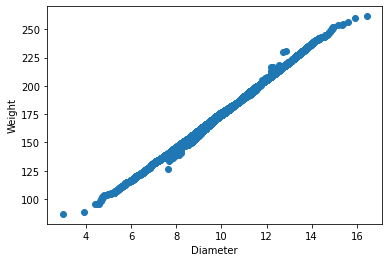

In [201]:
plt.scatter(x = df['diameter'], y = df['weight'])
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.show()

In [202]:
df_train = df[['diameter','weight']]

In [203]:
df_train

,diameter,weight
0,2.96,86.76
1,3.91,88.05
2,4.42,95.17
3,4.47,95.60
4,4.48,95.76
...,...,...
9995,15.35,253.89
9996,15.41,254.67
9997,15.59,256.50
9998,15.92,260.14


In [204]:
df_target = df['name']

In [205]:
kn.fit(df_train, df_target)

KNeighborsClassifier()

In [206]:
kn.score(df_train, df_target)

0.9833

In [207]:
for n in range(3, 20):
    kn.n_neighbors = n
    score = kn.score(df_train, df_target)
    print(n ,score)

3 0.9916
4 0.9838
5 0.9833
6 0.9746
7 0.9749
8 0.9684
9 0.9664
10 0.9623
11 0.9593
12 0.9556
13 0.9535
14 0.9496
15 0.9449
16 0.9414
17 0.9373
18 0.9346
19 0.9305


## 실습

In [208]:
orange_diameter = df.loc[df['name'] == 'orange', 'diameter']

In [209]:
orange_weight = df.loc[df['name'] == 'orange', 'weight']

In [210]:
grap_diameter = df.loc[df['name'] == 'grapefruit', 'diameter']

In [211]:
grap_wweight = df.loc[df['name'] == 'grapefruit', 'weight']

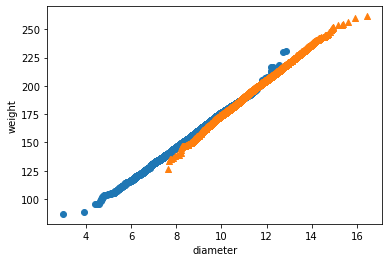

In [212]:
plt.scatter(x = orange_diameter, y = orange_weight)
plt.scatter(x = grap_diameter, y = grap_wweight, marker='^')
plt.xlabel('diameter')
plt.ylabel('weight')
plt.show()

In [213]:
df['class'] = df['name']

In [214]:
df

,name,diameter,weight,red,green,blue,class
0,orange,2.96,86.76,172,85,2,orange
1,orange,3.91,88.05,166,78,3,orange
2,orange,4.42,95.17,156,81,2,orange
3,orange,4.47,95.60,163,81,4,orange
4,orange,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20,grapefruit
9996,grapefruit,15.41,254.67,148,68,7,grapefruit
9997,grapefruit,15.59,256.50,168,82,20,grapefruit
9998,grapefruit,15.92,260.14,142,72,11,grapefruit


In [215]:
df.loc[df['class'] == 'orange', 'class'] = 1
df.loc[df['class'] == 'grapefruit', 'class'] = 0

In [216]:
df

,name,diameter,weight,red,green,blue,class
0,orange,2.96,86.76,172,85,2,1
1,orange,3.91,88.05,166,78,3,1
2,orange,4.42,95.17,156,81,2,1
3,orange,4.47,95.60,163,81,4,1
4,orange,4.48,95.76,161,72,9,1
...,...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20,0
9996,grapefruit,15.41,254.67,148,68,7,0
9997,grapefruit,15.59,256.50,168,82,20,0
9998,grapefruit,15.92,260.14,142,72,11,0


In [217]:
df_train = df[['diameter', 'weight']]
df_train

,diameter,weight
0,2.96,86.76
1,3.91,88.05
2,4.42,95.17
3,4.47,95.60
4,4.48,95.76
...,...,...
9995,15.35,253.89
9996,15.41,254.67
9997,15.59,256.50
9998,15.92,260.14


In [218]:
df_target = df['class'].astype(int)
df_target

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [219]:
kn = KNeighborsClassifier()

In [220]:
kn.fit(df_train, df_target)

KNeighborsClassifier()

In [221]:
kn.predict([[16, 251]])

array([0])

In [222]:
kn.predict([[10.5, 171.0]])

array([0])

In [223]:
kn.predict([[6, 150]])

array([1])

### 거리 변환

In [182]:
kn = KNeighborsClassifier(weights='distance', p=1, metric='minkowski')

In [183]:
kn.fit(df_train, df_target)

KNeighborsClassifier(p=1, weights='distance')

In [184]:
kn.score(df_train, df_target)

0.9999

In [185]:
for n in range(5, 50):
    kn.n_neighbors = n
    score = kn.score(df_train, df_target)
    print(n, score)

5 0.9999
6 0.9999
7 0.9999
8 0.9999
9 0.9999
10 0.9999
11 0.9999
12 0.9999
13 0.9999
14 0.9999
15 0.9999
16 0.9999
17 0.9999
18 0.9999
19 0.9999
20 0.9999
21 0.9999
22 0.9999
23 0.9999
24 0.9999
25 0.9999
26 0.9999
27 0.9999
28 0.9999
29 0.9999
30 0.9999
31 0.9999
32 0.9999
33 0.9999
34 0.9999
35 0.9999
36 0.9999
37 0.9999
38 0.9999
39 0.9999
40 0.9999
41 0.9999
42 0.9999
43 0.9999
44 0.9999
45 0.9999
46 0.9999
47 0.9999
48 0.9999
49 0.9999


In [186]:
kn.n_neighbors = 5

In [188]:
kn.predict([[16, 251]])

array([0])

In [189]:
kn.predict([[10.5, 171.0]])

array([0])

In [194]:
kn.predict([[6, 150]])

array([1])

#### train, test 데이터 split

In [133]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_valid, y_train, y_valid = train_test_split(df_train, df_target, test_size=0.2, shuffle=True, stratify=df_target)

In [152]:
kn = KNeighborsClassifier()

In [153]:
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [154]:
kn.score(x_valid, y_valid)

0.968

In [155]:
for n in range(5, 50):
    kn.n_neighbors = n
    score = kn.score(x_valid, y_valid)
    print(n, score)

5 0.968
6 0.963
7 0.9575
8 0.9595
9 0.955
10 0.9515
11 0.943
12 0.942
13 0.9355
14 0.934
15 0.9285
16 0.9305
17 0.921
18 0.921
19 0.918
20 0.915
21 0.913
22 0.9135
23 0.908
24 0.9095
25 0.906
26 0.9085
27 0.903
28 0.905
29 0.901
30 0.9035
31 0.9005
32 0.9005
33 0.8995
34 0.9005
35 0.8955
36 0.898
37 0.8965
38 0.8995
39 0.8985
40 0.9
41 0.897
42 0.898
43 0.896
44 0.8975
45 0.8955
46 0.8945
47 0.8925
48 0.894
49 0.894


In [156]:
kn.score(x_valid, y_valid)

0.894

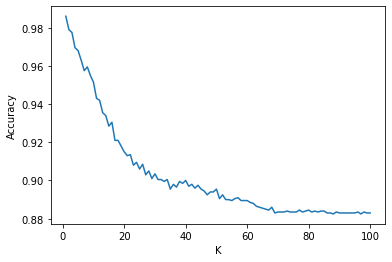

In [158]:
k_list = range(1, 101)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(x_train, y_train)
    accuracies.append(classifier.score(x_valid, y_valid))
    
plt.plot(n_list, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

```
Score 정확도 값
kn.predict([16.0, 251.0])
kn.predict([10.5, 171.0])
```